#Predikcija eritemoskvamoznih dermatoza

[Podešavanje runtime-a](https://drlee.io/utilizing-gpu-and-tpu-for-free-on-google-colab-a-comprehensive-guide-fe2841592851).

**Cilj** ovog projekta je da se razvije robustan model za tačnu dijagnozu eritematoskvamoznih dermatoza na osnovu kliničkih i histopatoloških karakteristika. Ove bolesti, uključujući psorijazu, seboroični dermatitis, lihen planus, pitiriasis rosea, hronični dermatitis i pitiriasis rubra pilaris, imaju slične kliničke simptome eritema i perutanja, što njihovu diferencijalnu dijagnozu čini izazovom. Koristeći tehnike mašinskog učenja, cilj nam je da stvorimo model koji može razlikovati ove bolesti na osnovu dostupnih karakteristika.

**Skup podataka** koji se koristi za ovaj projekat sastoji se od kliničkih i histopatoloških podataka pacijenata sa eritematoskvamoznim oboljenjima. Skup podataka uključuje 12 kliničkih karakteristika i 22 histopatološke karakteristike. Kliničke karakteristike predstavljaju zapažanja dobijena tokom kliničke evaluacije, dok se histopatološke karakteristike određuju mikroskopskom analizom uzoraka kože.

U ovom skupu podataka, obeležje porodične istorije je kodirano kao 1 ako je bilo koja od bolesti u eritematoskvamoznoj grupi primećena u porodici i 0 u suprotnom.

Starosna karakteristika predstavlja starost pacijenta.

Preostalim karakteristikama, kliničkim i histopatološkim, dodeljuju se vrednosti na skali od 0 do 3. Vrednost od 0 označava odsustvo obeležja, dok vrednost 3 predstavlja najviši stepen ili najveću količinu osobine. Srednje vrednosti 1 i 2 ukazuju na relativne srednje nivoe karakteristike. Skup podataka ima za cilj da pomogne u diferencijalnoj dijagnozi ovih bolesti korišćenjem kliničkih i histopatoloških informacija. Obučavanjem modela mašinskog učenja na ovom skupu podataka, cilj nam je da poboljšamo tačnost i efikasnost dijagnostikovanja eritematoskvamoznih bolesti, smanjujući potrebu za invazivnim procedurama kao što su biopsije.

Fokusiraćemo se na poređenju rezultata tačnosti različitih modela da bismo identifikovali najefikasniji model za predviđanje eritematoskvamoznog oboljenja. Koristeći prediktore skupa podataka, mi ćemo konstruisati i proceniti više modela, od kojih svaki koristi različite algoritme ili tehnike. Performanse ovih modela će biti procenjene na osnovu njihove tačnosti i troškova izračunavanja u predviđanju.

Stranica na kojo se nalazi skup podataka: https://vvv.kaggle.com/datasets/olcaibolat1/dermatologi-dataset-classification

## Instalacija neophodnih biblioteka

U ovoj sekciji uvozimo potrebne biblioteke i module u notebook. Ove biblioteke pružaju osnovne funkcije za analizu i modeliranje podataka, kao što su manipulacija podacima, vizuelizacija i algoritmi mašinskog učenja. Uvoz neophodnih biblioteka postavlja osnovu za kasniju analizu.

In [1]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.7 MB/s eta 0:00:00


In [2]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [56]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

##Exploratory Data Analysis (EDA)

Ova sekcija sadrži izvođenje istraživačke analize kako bi se stekao uvid u skup podataka. Kroz vizuelizaciju podataka i statističke rezimee, istražujemo distribucije, odnose i karakteristike varijabli. EDA nam pomaže da bolje razumemo podatke i identifikujemo sve obrasce ili trendove koji mogu da postoje.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/DF/dermatology_database_1.csv")

In [6]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [7]:
df.shape

(366, 35)

In [8]:
df['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

S obzirom na prisustvo neravnoteže klasa u skupu podataka, ključno je koristiti odgovarajuće metrike evaluacije koje mogu efikasno da reše ovaj problem. U ovoj analizi koristićemo metrike kao što je F1 score da bismo procenili performanse klasifikatora mašinskog učenja. Ovaj pristup nam omogućava da precizno procenimo sposobnost modela da se nosi sa neravnotežom klasa i napravi pouzdana predviđanja. Ispitujući kako se različiti ML klasifikatori nose sa ovim izazovom, možemo steći dobar uvid u njihovu efikasnost i primenu
 za dati skup podataka.

## Data Cleaning

Data Cleaning je bitan korak u fazi prethodne obrade podataka. To
uključuje manipulaciju sa nedostajućim vrednostima, uklanjanje duplikata i rešavanje nedoslednosti ili grešaka prisutnih u skupu podataka. Obezbeđivanjem čistoće i pouzdanosti podataka značajno smanjujemo verovatnoću pristrasne ili netačne analize.

Data Cleaning igra ključnu ulogu u postizanju „urednih podataka“, što je neophodno za efikasno sprovođenje daljih operacija i analiza. U ovoj sekciji ćemo pažljivo analizirati tipove podataka varijabli i korigovati ih ako je potrebno. Pored toga, identifikovaćemo i radićemo sa nultim vrednostima.

Pridržavajući se robusnih praksi Data Cleaning-a, osiguravamo da je skup podataka u optimalnom stanju za kasniju analizu i modeliranje.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [10]:
df.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

Korišćenjem funkcije ***df.isna()*** možemo potvrditi da u skupu podataka nema null vrednosti. Međutim, nakon dalje analize, primetili smo da postoje neki redovi u skupu podataka u kojima je kolona starosti označena kao "?". Da bismo rešili ovaj problem, uklonićemo redove koji sadrže „?" vrednost u koloni "age" iz skupa podataka. Ovaj korak osigurava da podaci ostanu tačni i pouzdani za kasniju analizu.

In [11]:
age_values_with_question_mark = df[df['age'] == '?']
age_values_with_question_mark

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [12]:
df['age'] = df['age'].replace('?', np.nan)  # Replace '?' with NaN

# we remove rows with NaN values in the 'age' column using dropna() function
df.dropna(subset=['age'], inplace=True)

In [13]:
age_values_with_question_mark = df[df['age'] == '?']
age_values_with_question_mark

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class


In [14]:
df['class'].value_counts()

1    111
3     71
2     60
5     48
4     48
6     20
Name: class, dtype: int64

In [15]:
df.dtypes

erythema                                int64
scaling                                 int64
definite_borders                        int64
itching                                 int64
koebner_phenomenon                      int64
polygonal_papules                       int64
follicular_papules                      int64
oral_mucosal_involvement                int64
knee_and_elbow_involvement              int64
scalp_involvement                       int64
family_history                          int64
melanin_incontinence                    int64
eosinophils_infiltrate                  int64
PNL_infiltrate                          int64
fibrosis_papillary_dermis               int64
exocytosis                              int64
acanthosis                              int64
hyperkeratosis                          int64
parakeratosis                           int64
clubbing_rete_ridges                    int64
elongation_rete_ridges                  int64
thinning_suprapapillary_epidermis 

Kolona „age“ u skupu podataka je trenutno tipa objekta. Da bismo koristili starost kao ulaznu karakteristiku u našoj analizi, moramo da je konvertujemo u celobrojni tip. Na taj način obezbeđujemo da su vrednosti starosti predstavljene numerički i da se mogu efikasno koristiti u našim modelima i proračunima.

In [16]:
df['age'] = df['age'].astype(float).astype(pd.Int64Dtype())

In [17]:
df.dtypes

erythema                               int64
scaling                                int64
definite_borders                       int64
itching                                int64
koebner_phenomenon                     int64
polygonal_papules                      int64
follicular_papules                     int64
oral_mucosal_involvement               int64
knee_and_elbow_involvement             int64
scalp_involvement                      int64
family_history                         int64
melanin_incontinence                   int64
eosinophils_infiltrate                 int64
PNL_infiltrate                         int64
fibrosis_papillary_dermis              int64
exocytosis                             int64
acanthosis                             int64
hyperkeratosis                         int64
parakeratosis                          int64
clubbing_rete_ridges                   int64
elongation_rete_ridges                 int64
thinning_suprapapillary_epidermis      int64
spongiform

Proces čišćenja podataka za naš skup podataka je završen. Iznad su poslednje kolone i njihovi odgovarajući tipovi podataka nakon neophodnih prilagođavanja.

##Data Visualization

U ovoj sekciji koristimo tehnike vizuelizacije podataka da bismo vizuelno istražili i preneli uvide iz polaznog skupa podataka. Kreiranjem smislenih i informativnih vizuelnih predstava kao što su dijagrami i grafikoni, cilj nam je da otkrijemo obrasce, odnose i trendove unutar podataka. Vizuelizacija podataka poboljšava naše razumevanje skupa podataka, olakšavajući prenošenje nalaza i ključnih poruka zainteresovanim stranama i donosiocima odluka. Kroz efikasne vizuelizacije, možemo istaći važne obrasce i korelacije, omogućavajući bolje donošenje odluka i uvide koji se mogu primeniti.

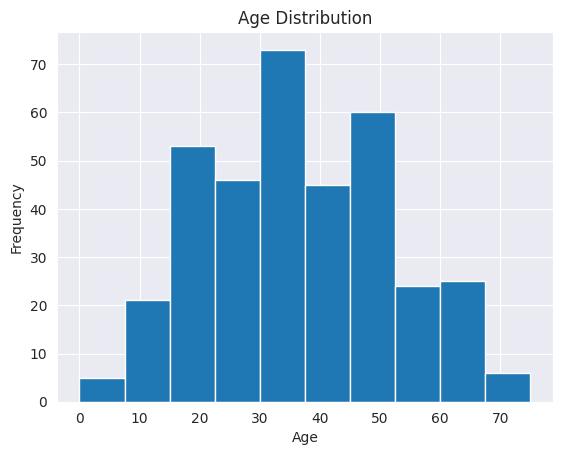

In [18]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'age' column
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

Histogram nam omogućava da vizuelizujemo distribuciju numeričke promenljive, kao što je kolona 'age' u našem DataFrame-u. Iscrtavanjem histograma možemo razumeti učestalost i opseg uzrasta prisutnih u našem skupu podataka. Ovo može pomoći da se identifikuju obrasci ili anomalije u starosnoj distribuciji, na primer da li je iskrivljena, normalno raspoređena ili ima značajne vrhove ili padove.

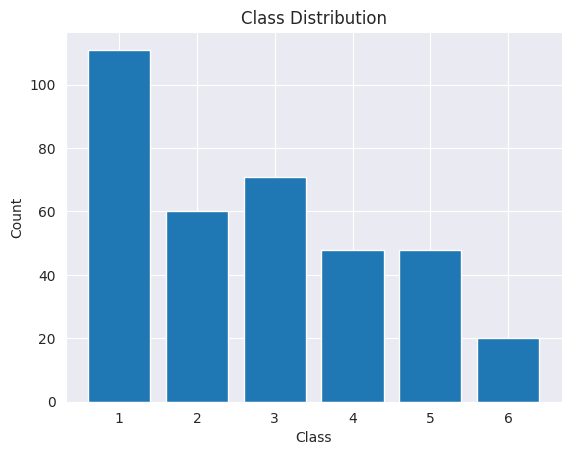

In [19]:
# Plot a bar plot of the 'class' column
class_counts = df['class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

Barplot je koristan za vizuelizaciju učestalosti ili broja različitih kategorija u kategoričkoj promenljivoj, kao što je kolona 'class' u našem DataFrame-u. Iscrtavanjem dijagrama, možemo uporediti broj instanci za svaku klasu i steći uvid u distribuciju klasa. Ova vizualizacija može otkriti neravnoteženje klasa, identifikovati dominantne ili manjinske klase ili pružiti pregled distribucije ciljne varijable.

In [20]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

corr_matrix

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
erythema,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.028225,-0.115275,-0.033391,0.138519,0.180740,...,0.153229,-0.003972,0.038837,-0.012408,-0.008997,0.006100,0.093026,-0.013850,-0.005028,-0.324846
scaling,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.075013,-0.098665,-0.084815,0.294258,0.295932,...,0.205046,-0.113133,0.023095,-0.118109,-0.014702,-0.015402,-0.008453,-0.134966,0.016006,-0.458499
definite_borders,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322657,-0.176715,0.280341,0.301187,0.261495,...,0.350007,0.291443,-0.252643,0.267409,-0.093264,-0.131788,0.124812,0.275099,0.138493,-0.381456
itching,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.412525,-0.144027,0.361761,-0.296824,-0.152562,...,-0.190548,0.371404,0.003028,0.380075,-0.176096,-0.184385,0.051553,0.389887,0.048053,0.039744
koebner_phenomenon,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.388233,-0.175676,0.387937,-0.065438,0.013496,...,0.002588,0.372236,0.006726,0.377539,-0.150348,-0.166956,0.110295,0.377323,0.081162,-0.089586
polygonal_papules,0.028225,-0.075013,0.322657,0.412525,0.388233,1.000000,-0.139384,0.863269,-0.278843,-0.258231,...,-0.122467,0.911598,0.091031,0.894775,-0.097084,-0.112007,0.258753,0.904112,0.096953,0.064451
follicular_papules,-0.115275,-0.098665,-0.176715,-0.144027,-0.175676,-0.139384,1.000000,-0.134484,0.220849,-0.007320,...,-0.161487,-0.142335,-0.012624,-0.141489,0.784991,0.844721,-0.093833,-0.136311,-0.371368,0.488708
oral_mucosal_involvement,-0.033391,-0.084815,0.280341,0.361761,0.387937,0.863269,-0.134484,1.000000,-0.286160,-0.264638,...,-0.109676,0.886238,0.129879,0.873730,-0.084040,-0.108070,0.276068,0.890685,0.111047,0.062185
knee_and_elbow_involvement,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.278843,0.220849,-0.286160,1.000000,0.659286,...,0.480594,-0.285184,-0.417851,-0.283383,0.231977,0.256811,-0.079246,-0.279753,-0.078267,-0.382276
scalp_involvement,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.258231,-0.007320,-0.264638,0.659286,1.000000,...,0.485260,-0.257697,-0.425421,-0.262429,-0.055091,-0.020456,0.027887,-0.255333,0.036412,-0.534716


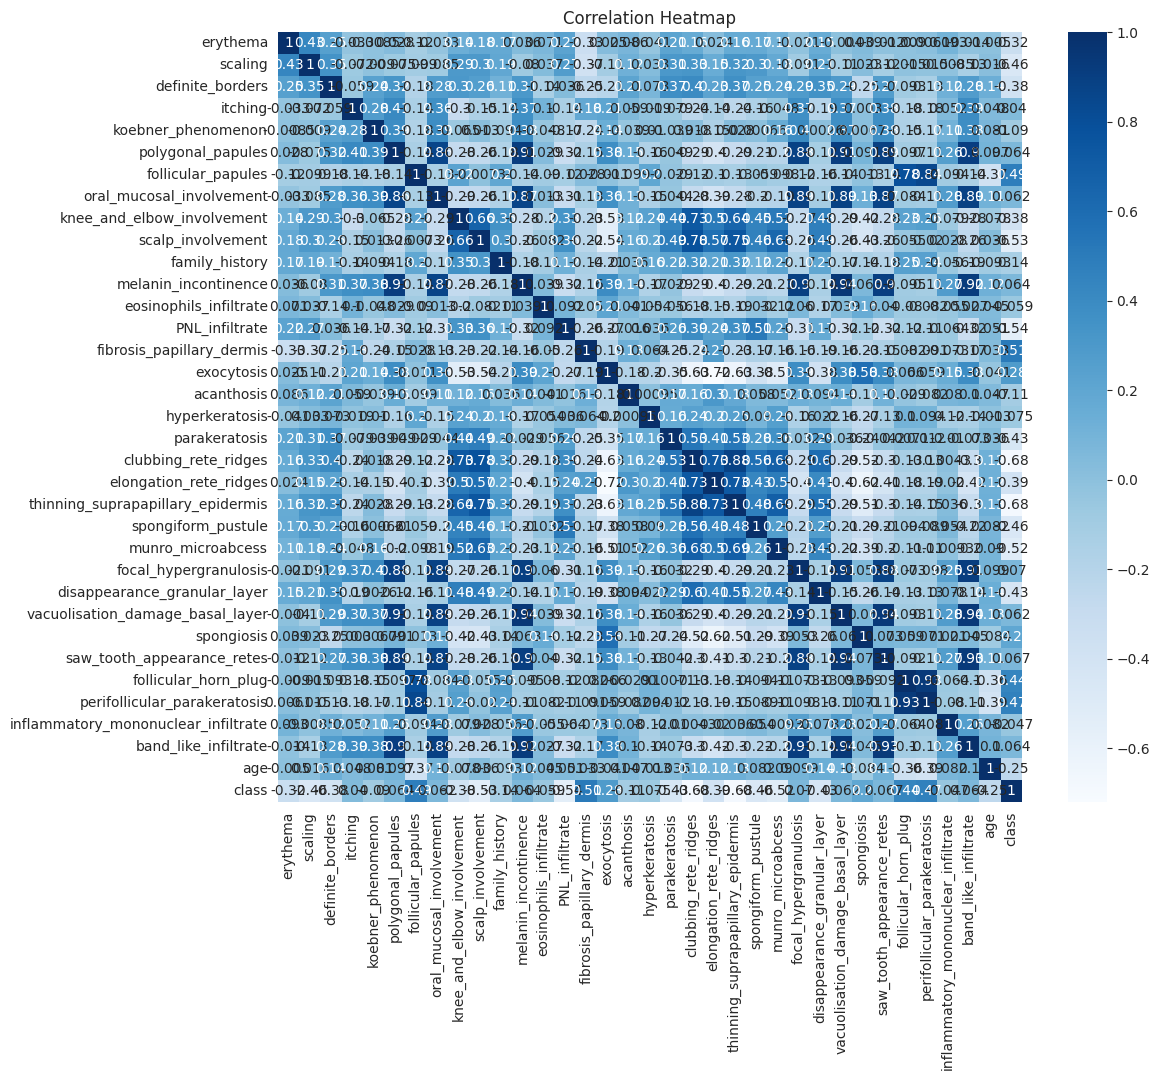

In [21]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

Heatmap korelacija pomaže u vizuelizaciji parnih korelacija između numeričkih varijabli u našem DataFrame-u. Izračunavanjem korelacione matrice i vizuelnim prikazom (heatmap-om), možemo identifikovati jačinu i pravac odnosa između različitih varijabli. Ovo može pomoći u razumevanju međuzavisnosti između varijabli i identifikovanju potencijalnih obrazaca ili asocijacija. Na primer, ako dve varijable imaju visoku pozitivnu korelaciju, to ukazuje da imaju tendenciju da se zajedno povećavaju ili smanjuju. Suprotno tome, visoka negativna korelacija ukazuje na inverznu vezu.

## Razumevanje podataka upotrebom t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) je tehnika smanjenja dimenzionalnosti koja se koristi za vizuelizaciju visokodimenzionalnih podataka u prostoru niže dimenzije. U ovom odeljku primenjujemo t-SNE da bismo bolje razumeli strukturu podataka i identifikovali potencijalne klastere ili obrasce koji mogu postojati u skupu podataka.

In [22]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [23]:
le = LabelEncoder()
y = le.fit_transform(y)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 358 samples in 0.001s...
[t-SNE] Computed neighbors for 358 samples in 0.372s...
[t-SNE] Computed conditional probabilities for sample 358 / 358
[t-SNE] Mean sigma: 3.587629
[t-SNE] Computed conditional probabilities in 0.108s
[t-SNE] Iteration 50: error = 51.8298569, gradient norm = 0.0296209 (50 iterations in 3.329s)
[t-SNE] Iteration 100: error = 50.9239845, gradient norm = 0.0035901 (50 iterations in 1.588s)
[t-SNE] Iteration 150: error = 50.9222946, gradient norm = 0.0190479 (50 iterations in 1.341s)
[t-SNE] Iteration 200: error = 50.9073181, gradient norm = 0.0138621 (50 iterations in 0.577s)
[t-SNE] Iteration 250: error = 50.8924026, gradient norm = 0.0086349 (50 iterations in 0.384s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.892403
[t-SNE] Iteration 300: error = 0.3943576, gradient norm = 0.0095891 (50 iterations in 1.455s)
[t-SNE] Iteration 350: error = 0.3298436, gradient norm = 0.0031184 (

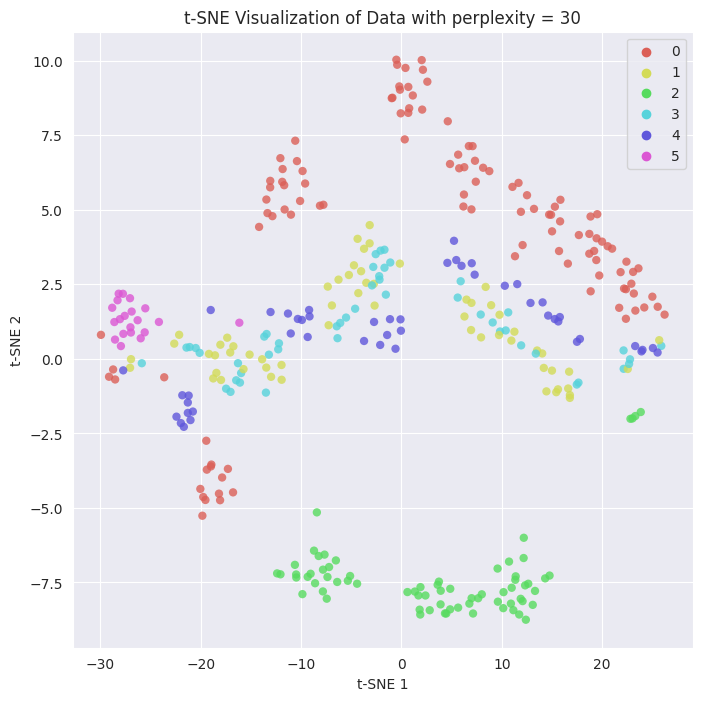

In [24]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=110, verbose=2)
x_tsne = tsne.fit_transform(x)


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=0.8, edgecolor='none'
)


plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 30')
plt.legend(loc='upper right')
plt.show()

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 358 samples in 0.004s...
[t-SNE] Computed neighbors for 358 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 358 / 358
[t-SNE] Mean sigma: 6.469945
[t-SNE] Computed conditional probabilities in 0.038s
[t-SNE] Iteration 50: error = 42.4332123, gradient norm = 0.0369293 (50 iterations in 0.195s)
[t-SNE] Iteration 100: error = 41.9670181, gradient norm = 0.0000821 (50 iterations in 0.348s)
[t-SNE] Iteration 150: error = 41.9667130, gradient norm = 0.0001025 (50 iterations in 2.359s)
[t-SNE] Iteration 200: error = 41.9666748, gradient norm = 0.0001020 (50 iterations in 2.114s)
[t-SNE] Iteration 250: error = 41.9668388, gradient norm = 0.0000994 (50 iterations in 0.670s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.966839
[t-SNE] Iteration 300: error = 0.1302846, gradient norm = 0.0068698 (50 iterations in 0.133s)
[t-SNE] Iteration 350: error = 0.1201836, gradient norm = 0.0007308 

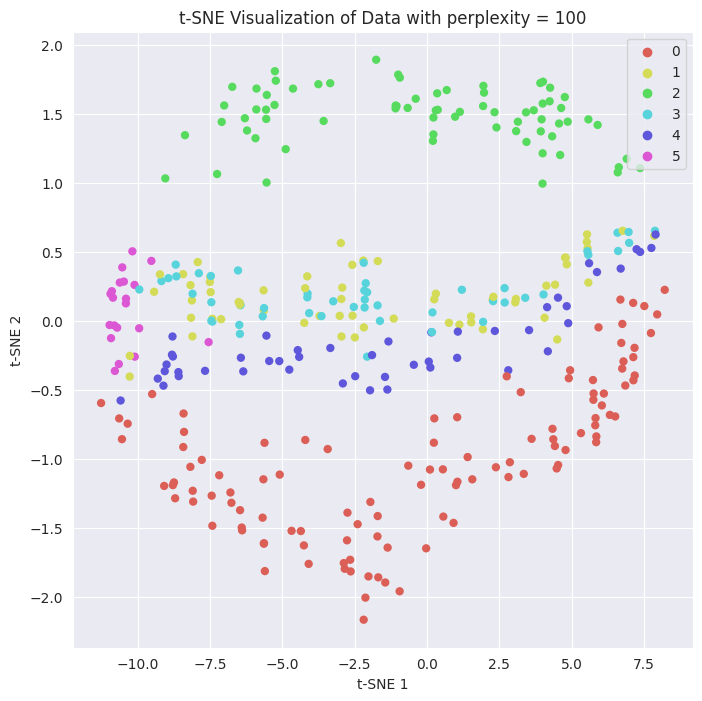

In [25]:
# Apply t-SNE with higher perplexity
tsne = TSNE(n_components=2, random_state=110, verbose=2, perplexity = 100)
x_tsne = tsne.fit_transform(x)


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=1, edgecolor='none'
)


plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 100')
plt.legend(loc='upper right')
plt.show()

[t-SNE] Computing 357 nearest neighbors...
[t-SNE] Indexed 358 samples in 0.001s...
[t-SNE] Computed neighbors for 358 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 358 / 358
[t-SNE] Mean sigma: 11.871308
[t-SNE] Computed conditional probabilities in 0.049s
[t-SNE] Iteration 50: error = 36.1412888, gradient norm = 0.0000002 (50 iterations in 0.184s)
[t-SNE] Iteration 100: error = 36.1411057, gradient norm = 0.0000000 (50 iterations in 0.173s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 100 iterations with early exaggeration: 36.141106
[t-SNE] Iteration 150: error = 0.0692986, gradient norm = 0.0084707 (50 iterations in 0.176s)
[t-SNE] Iteration 200: error = 0.0257814, gradient norm = 0.0002528 (50 iterations in 0.177s)
[t-SNE] Iteration 250: error = 0.0257797, gradient norm = 0.0001381 (50 iterations in 0.185s)
[t-SNE] Iteration 300: error = 0.0258418, gradient norm = 0.0003348 (50 iterations in 0.186s)
[t-SNE] Itera

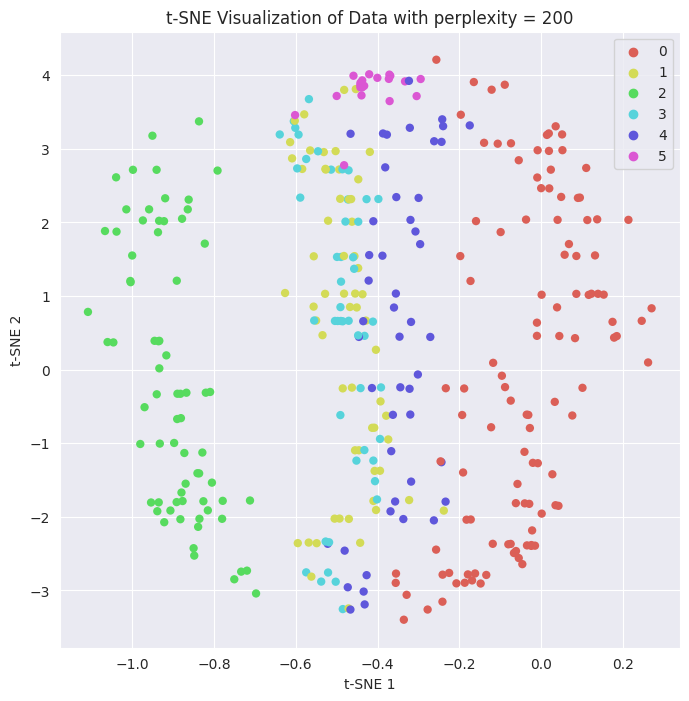

In [26]:
# Apply t-SNE with more high perplexity
tsne = TSNE(n_components=2, random_state=110, verbose=2, perplexity = 200)
x_tsne = tsne.fit_transform(x)


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=1, edgecolor='none'
)


# plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 200')
plt.legend(loc='upper right')
plt.show()

Nakon analize skupa podataka, možemo primetiti da su karakteristike klasa '0', '2' i '5' dobro razdvojene i uočljive. Međutim, klase sa labelama '1', '3' i '4' se preklapaju, što ih čini težim za diferencijaciju. Ova priroda preklapanja može predstavljati poteškoće za naš model. Možemo dalje ispitati ovo zapažanje pregledom matrice konfuzije i izveštaja o klasifikaciji tokom procesa evaluacije modela.

## Priprema podataka za kreiranje modela ML-a

Ovaj odeljak se fokusira na pripremu podataka za kreiranje modela mašinskog učenja. Uključuje različite korake prethodne obrade kao što su skaliranje karakteristika, kodiranje kategoričkih varijabli i podela podataka u skupove za obuku i testiranje. Pravilna priprema podataka osigurava da su u odgovarajućem formatu za obuku i evaluaciju.

In [27]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [28]:
le = LabelEncoder()
y = le.fit_transform(y)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 110)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(286, 34)
(286,)
(72, 34)
(72,)


Sada kada smo pripremili naše skupove podataka za obuku i testiranje, možemo da nastavimo sa procenom performansi više klasifikatora mašinskog učenja. Tokom ove evaluacije, mi ćemo proceniti različite metrike kao što su tačnost, preciznost, recall, F1 score i vreme treninga za svaki klasifikator. Ova komparativna analiza će nam omogućiti da utvrdimo efikasnost različitih klasifikatora u predviđanju eritematoskvamoznih dermatoza na osnovu našeg skupa podataka.

Sistematski procenjujući metriku učinka svakog klasifikatora, možemo steći uvid u njihove prednosti i slabosti. Ove informacije će pomoći u odabiru najpogodnijeg klasifikatora za naš specifični zadatak predviđanja eritematoskvamozne dermatoze. Pored toga, poređenje metrike u različitim klasifikatorima će pružiti informacije za donošenje odluka i optimizaciju našeg pristupa kreiranja modela.

Pokazatelji učinka, uključujući tačnost, preciznost, recall, F1 score i vreme treninga, biće zabeleženi i analizirani kako bi se identifikovao klasifikator koji postiže najbolje ukupne performanse. Ovaj proces će doprineti izboru robusnog i tačnog modela za predviđanje eritematoskvamozne dermatoze u datom skupu podataka.

## Procena ML klasifikatora

Ovde procenjujemo performanse različitih klasifikatora mašinskog učenja na skupu podataka. Mi procenjujemo metrike kao što su tačnost, preciznost, recall i F1 score da bismo utvrdili koliko dobro svaki model predviđa eritematoskvamoznu dermatozu. Upoređivanjem rezultata možemo identifikovati modele koji imaju najbolje rezultate na našem skupu podataka.

In [31]:
# Define a dictionary to store the results
results = {}

In [32]:
# Define a dictionary to store runtime machine execution time values
results_time = {}

## 1. Logistička regresija

Linearni klasifikator koji predvođa verovatnoću ciljne klase koristeći logističku funkciju. To je jednostavan, ali efikasan metod koji dobro funkcioniše kada su klase linearno odvojive. Takođe je lako interpretirati koeficijente modela logističke regresije.

In [33]:
%%time
start_time = time.time()
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Logistic Regression'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 40.6 ms, sys: 3.09 ms, total: 43.6 ms
Wall time: 54.1 ms


## 2. K najbližih suseda (KNN)

Neparametarski klasifikator koji pronalazi K najbližih suseda instanci koja se ispituje i dodeljuje joj labelu većinske klase. To je jednostavan i intuitivan metod koji dobro funkcioniše za male skupove podataka i može da obrađuje nelinearne odnose između karakteristika i ciljne klase.

In [34]:
%%time
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['K-Nearest Neighbors (KNN)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 23.9 ms, sys: 429 µs, total: 24.3 ms
Wall time: 19.2 ms


## 3. Gaussian Naive Bayes (GaussianNB)

Verovatnosni klasifikator koji modelira zajedničku distribuciju karakteristika i ciljne klase koristeći Bajesovu teoremu i pretpostavku da su karakteristike uslovno nezavisne date ciljnoj klasi. To je jednostavan i brz metod koji dobro funkcioniše za klasifikaciju teksta i druge probleme većih dimenzija.

In [35]:
%time
start_time = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['GaussianNB'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


## 4. Stabla odlučivanja

Neparametarski klasifikator koji modeluje pravila odlučivanja kao stablo. To je moćan metod koji dobro funkcioniše i za probleme klasifikacije i za regresiju. Takođe je lako protumačiti pravila odlučivanja i važnost karakteristika.

In [36]:
%%time
start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Decision Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 9.81 ms, sys: 0 ns, total: 9.81 ms
Wall time: 10.8 ms


## 5. Random Forest

Metod Random Forest koji kombinuje više stabala odlučivanja agregirajući njihova predviđanja. To je moćna i robusna metoda koja dobro funkcioniše za probleme velikih dimenzija i može da se nosi sa nelinearnim odnosima između karakteristika i ciljne klase.

In [37]:
%%time
start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 173 ms, sys: 910 µs, total: 174 ms
Wall time: 176 ms


## 6. Extra Trees

Extra Trees je metoda zasnovana na stablima koja nasumično bira podskupove karakteristika i pragova da bi se smanjio overfitting (preobučavanje). Može da obrađuje visokodimenzionalne podatke i može biti računski efikasnija od Random Forest metode. Što se tiče performansi, Extra Trees može postići dobru preciznost na skupovima podataka visoke dimenzije i sa relativno malim skupovima podataka za obuku.

In [38]:
%%time
start_time = time.time()
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
y_pred = et.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Extra Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 146 ms, sys: 2.97 ms, total: 149 ms
Wall time: 147 ms


## 7. Support Vector Machines (SVM)

Linearni ili nelinearni klasifikator koji pronalazi hiperravan koja maksimizuje marginu između klasa. To je moćan metod koji dobro funkcioniše i za linearno i za nelinearno odvojive probleme. Takođe je manje sklon overfitt-u od drugih metoda.

In [39]:
%%time
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Support Vector Machines'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 17.9 ms, sys: 0 ns, total: 17.9 ms
Wall time: 18.3 ms


## 8. Neuronske mreže (Višeslojni perceptron, MLP)

Fleksibilna i moćna metoda koja koristi više slojeva međusobno povezanih neurona da nauči složene odnose između karakteristika i ciljne klase. To je najsavremenija metoda koja dobro funkcioniše za širok spektar problema, uključujući prepoznavanje slika, obradu prirodnog jezika i prepoznavanje govora.

In [40]:
%%time
start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Neural Networks (Multi-layer Perceptron)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 525 ms, sys: 369 ms, total: 894 ms
Wall time: 493 ms


## 9. AdaBoost

Metod ansambla koji kombinuje više slabih klasifikatora prilagođavanjem težine uzoraka za obuku na osnovu njihove greške u klasifikaciji. To je moćna metoda koja dobro funkcioniše i za probleme klasifikacije i za regresiju i može da obrađuje nelinearne odnose između karakteristika i ciljne klase.

In [41]:
%%time
start_time = time.time()
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['AdaBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 217 ms, sys: 60.2 ms, total: 277 ms
Wall time: 216 ms


## 10. XGBoost

Optimizovana implementacija rastućih gradijenta koja koristi algoritam paralelne konstrukcije stabla i novu metodu regularizacije. To je najsavremenija metoda koja dobro funkcioniše za velike skupove podataka i može da obrađuje nelinearne odnose između karakteristika i ciljne klase.

In [42]:
%%time
start_time = time.time()
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['XGBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 167 ms, sys: 8.81 ms, total: 175 ms
Wall time: 128 ms


## 11. Light Gradient Boosting Machine (LGBM)

Optimizovana implementacija rastućeg gradijenta koja koristi algoritam uzorkovanja zasnovan na gradijentu i novi algoritam za konstrukciju stabla po listovima. To je najsavremenija metoda koja dobro funkcioniše za velike skupove podataka i može da obrađuje nelinearne odnose između karakteristika i ciljne klase.

In [43]:
%%time
start_time = time.time()
lgbm = lgbm.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['LightGBM'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 286, number of used features: 32
[LightGBM] [Info] Start training from score -1.178655
[LightGBM] [Info] Start training from score -1.849329
[LightGBM] [Info] Start training from score -1.612941
[LightGBM] [Info] Start training from score -2.018406
[LightGBM] [Info] Start training from score -1.942420
[LightGBM] [Info] Start training from score -2.822778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

## 12. CatBoost

Metoda ansambla koja kombinuje više stabala odlučivanja primenom povećanja gradijenta sa pojačanjem, simetričnim stablima i novom metodom rukovanja kategorijama karakteristikama. To je najsavremenija metoda koja dobro funkcioniše i za probleme klasifikacije i za regresione probleme i može da obrađuje kategoričke karakteristike sa visokom kardinalnošću.

In [44]:
%%time
start_time = time.time()
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['CatBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

Learning rate set to 0.074233
0:	learn: 1.6306339	total: 48.8ms	remaining: 48.8s
1:	learn: 1.5070646	total: 50.8ms	remaining: 25.3s
2:	learn: 1.4207748	total: 52.6ms	remaining: 17.5s
3:	learn: 1.3199555	total: 54.4ms	remaining: 13.5s
4:	learn: 1.2505904	total: 56.2ms	remaining: 11.2s
5:	learn: 1.1652868	total: 58ms	remaining: 9.61s
6:	learn: 1.0790877	total: 59.8ms	remaining: 8.48s
7:	learn: 1.0086932	total: 61.6ms	remaining: 7.63s
8:	learn: 0.9405742	total: 63.4ms	remaining: 6.98s
9:	learn: 0.8869727	total: 65.1ms	remaining: 6.45s
10:	learn: 0.8423178	total: 66.9ms	remaining: 6.01s
11:	learn: 0.7924959	total: 68.7ms	remaining: 5.65s
12:	learn: 0.7410671	total: 70.5ms	remaining: 5.35s
13:	learn: 0.7048003	total: 79.2ms	remaining: 5.57s
14:	learn: 0.6631168	total: 81.6ms	remaining: 5.36s
15:	learn: 0.6291249	total: 83.7ms	remaining: 5.15s
16:	learn: 0.5954549	total: 85.7ms	remaining: 4.96s
17:	learn: 0.5655816	total: 87.5ms	remaining: 4.77s
18:	learn: 0.5366418	total: 89.5ms	remaining: 

## 13. Stohastički gradijentni spust (SGD)

SGD je optimizacioni algoritam koji se može koristiti za linearnu i logističku regresiju, kao i za obuku dubokih neuronskih mreža. Posebno je koristan za velike probleme mašinskog učenja i može da konvergira brže od grupnog gradijenta spuštanja. Što se tiče performansi, SGD može postići dobru tačnost na velikim skupovima podataka, ali može biti osetljiv na podešavanje hiperparametara i izbor stope učenja.

In [45]:
%%time
start_time = time.time()
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Stochastic Gradient Descent (SGD)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 15.5 ms, sys: 921 µs, total: 16.4 ms
Wall time: 19.4 ms


## 14. Linear Discriminant Analysis (LDA)

LDA je metoda linearne klasifikacije koja modeluje uslovne gustine klasa i prioritete klasa. Pretpostavlja se da su podaci normalno raspoređeni i da su matrice kovarijanse jednake za sve klase. U pogledu performansi, LDA može postići dobru tačnost na skupovima podataka sa jasnim linearnim razdvajanjem između klasa, ali može biti osetljiva na pretpostavke normalnosti i jednakih matrica kovarijanse.

In [46]:
%%time
start_time = time.time()
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Linear Discriminant Analysis (LDA)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 12.1 ms, sys: 14 ms, total: 26.1 ms
Wall time: 26.5 ms


## 15. Quadratic Discriminant Analysis (QDA)

QDA je metoda nelinearne klasifikacije koja modelira uslovne gustine klasa i prioritete klasa. Pretpostavlja da su podaci normalno raspoređeni, ali dozvoljava različite matrice kovarijanse za svaku klasu. U pogledu performansi, QDA može postići dobru tačnost na skupovima podataka sa jasnim nelinearnim razdvajanjem između klasa, ali može biti osetljiv na pretpostavke normalnosti i broj karakteristika.

In [47]:
%%time
start_time = time.time()
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Quadratic Discriminant Analysis (QDA)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 15.8 ms, sys: 12.1 ms, total: 27.8 ms
Wall time: 22.7 ms


## Analiza rezultata modela

U ovom odeljku upoređujemo rezultate i performanse različitih modela mašinskog učenja. Analiziramo tačnost i druge relevantne metrike da bismo odredili najefikasniji model za predviđanje eritematoskvamozne dermatoze. Ovo poređenje nam pomaže da izaberemo model koji pruža najveću tačnost i pouzdanost predviđanja.

In [48]:
# Create a DataFrame from the results
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.944444,0.944444,0.944444,0.944444,0.049826
K-Nearest Neighbors (KNN),0.819444,0.826209,0.819444,0.821809,0.011027
GaussianNB,0.833333,0.905440,0.833333,0.801628,0.004525
Decision Trees,0.916667,0.926759,0.916667,0.913066,0.004203
Random Forest,0.958333,0.959867,0.958333,0.958607,0.171442
Extra Trees,0.972222,0.972222,0.972222,0.972222,0.143239
Support Vector Machines,0.694444,0.664198,0.694444,0.634755,0.014252
Neural Networks (Multi-layer Perceptron),0.958333,0.958526,0.958333,0.957909,0.485657
AdaBoost,0.736111,0.705929,0.736111,0.701767,0.210807
XGBoost,0.944444,0.946925,0.944444,0.944498,0.122924


## Analiza Random Forest

In [49]:
%%time
start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 173 ms, sys: 6 ms, total: 179 ms
Wall time: 174 ms


In [50]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.93      0.93      0.93        15
           2       1.00      1.00      1.00        14
           3       0.90      0.90      0.90        10
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         3

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



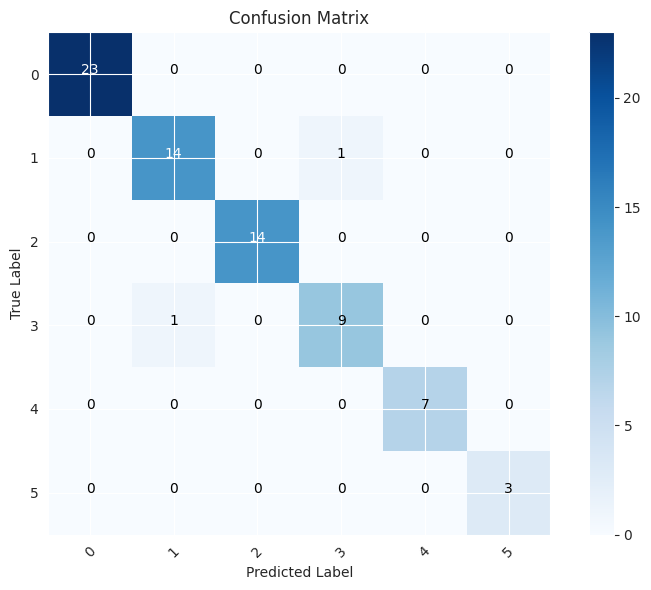

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = ['0', '1', '2', '3', '4', '5']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the cells of the confusion matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

## Analiza Linear Discriminant Analysis (LDA)

In [52]:
%%time
start_time = time.time()
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Linear Discriminant Analysis (LDA)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 17 ms, sys: 9.07 ms, total: 26.1 ms
Wall time: 39.6 ms


In [53]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.87      0.87      0.87        15
           2       1.00      1.00      1.00        14
           3       0.80      0.80      0.80        10
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         3

    accuracy                           0.94        72
   macro avg       0.94      0.94      0.94        72
weighted avg       0.94      0.94      0.94        72



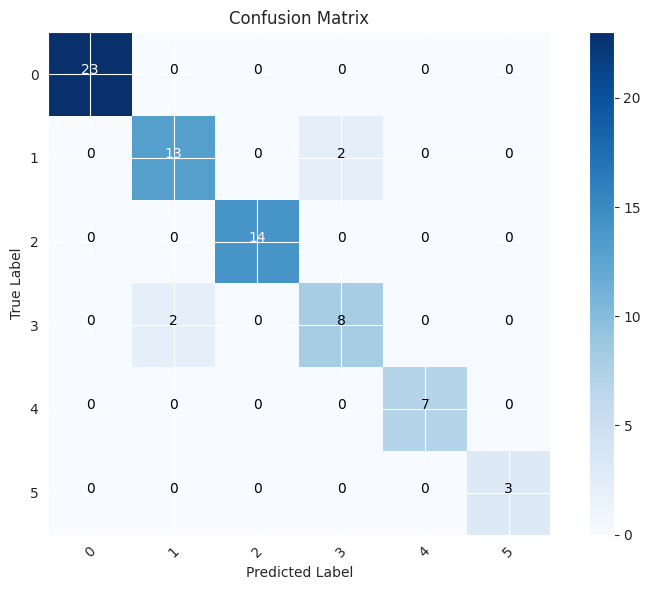

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = ['0', '1', '2', '3', '4', '5']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the cells of the confusion matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

Dataframe rezultata pdaje informacije o vremenu izvršavanja, preciznosti, recall-u i vrednosti F1 za svaki testirani model. Rezultati ukazuju na tačnost postignutu na testnog skupa podataka. Potrebno vreme predstavlja trajanje jedne iteracije za svaki model, pri čemu složeniji modeli obično zahtevaju više vremena. F1 score služi kao kombinovana metrika preciznosti i recall-a. Viši F1 rezultat implicira bolje performanse u pogledu obe metrike, što ga čini optimalnim kriterijumom za procenu modela.

Kao što je primećeno tokom t-SNE analize, instanca sa labelom '1' i '3' se ne klasifikuje uvek na ispravan način. Ovo zapažanje je u skladu sa rezultatima iz matrice konfuzije i izveštaja o klasifikaciji, gde postaje očigledno da model nailazi na izazove u preciznoj klasifikaciji slučajeva koji pripadaju ovim klasama. Performanse modela u ovim specifičnim klasama se odražavaju u matrici konfuzije i odražavaju se u metrikama iz izveštaja o klasifikaciji.

Među testiranim modelima, model Random Forest pokazuje najveću tačnost od 0.972222 i najviši F1 rezultat od 0.972222. Vreme računanja po iteraciji je malo više, pa je bolje da se usredsredimo na drugi model.

LDA takođe postiže uporedivu preciznost od 0.944444 i F1 rezultat od 0.944444. Značajno je da LDA model smanjuje vreme treniranja za čak red veličine (0.036755) u odnosu na RF model (0.709609).

## Testiranje aktivnog runtime type

In [55]:
import tensorflow as tf
# Check GPU availability
print("GPU Available:", tf.test.is_gpu_available())

# Check TPU availability
tpu_available = False
devices = tf.config.list_logical_devices()
for device in devices:
    print("Type: " + device.device_type)
    if device.device_type == 'TPU':
        tpu_available = True
        break

print("TPU Available:" + str(tpu_available))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available: False
Type: CPU
TPU Available:False
